In [1]:
from sympy import *
from IPython.display import display, Markdown, Math
from math import comb, prod
import itertools
import random
init_session(use_latex=True)

IPython console for SymPy 1.9 (Python 3.9.7-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.9/




General solution for degree 10:


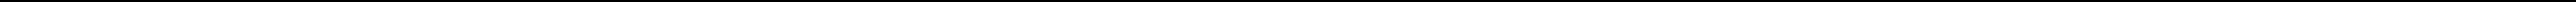


Example with random polynomial:



Solution for previous polynomial:



Pluggin the solution:


In [5]:
def Vertices(*args):
    return 2 + sum([args[i] * (i+1) for i in range(len(args))])

def Faces(*args):
    return sum(args)

def Edges(*args):
    return Vertices(*args) + Faces(*args) - 1

def R(*args): # args =[m_2, m_3, ...]
    # (Edges-1)!/((Edges-(m_2+m_3+m_4))! m_2! m_3! ...)
    vertices = Vertices(*args) # (2+m_2+2m_3+3m_4+...+(n-1)m_n)
    faces = Faces(*args) # (m_2+m_3+m_4+...+m_n)
    edges = vertices + faces - 1 # (1+2m_2+3m_3+4m_4+...+n m_n)
    r = factorial(edges-1)//factorial(edges-faces) # binomial(edges, faces) * (vertices-1)!/edges
    for m in args:
        r //= factorial(m)
    return r


def Binom(*args): # args =[m2, m3, ...]
    vertices = Vertices(*args)
    faces = Faces(*args)
    edges = vertices + faces - 1
    n = edges - 1
    r = 1
    for m in args: 
        r *= comb(n, m)
        n -= m
    r //= vertices - 1
    return r


def powers(n, k, c, terms = []):
    if not terms:
        terms = [0 for i in range(c+1)]
    if (k == n):
        terms[1] = -(-1)**k
        return [tuple(terms)]
    if c == 1:
        return []
    valids = powers(n, k, c-1, terms[::])
    while (c <= n) and (k > 0):
        terms[c] += 1
        n -= c
        k -= 1
        valids += powers(n, k, c-1, terms[::])
    return valids + powers(n, k, c-1, terms[::])
        
def diagonal(n, c):
    q = 0
    p = set(powers(2*n, n, c))
    for el in p:
        term = el[1] * Binom(*el[2:]) * globals()['c_1']**(n-sum(el[2:]))
        term *= prod([globals()['c_'+str(k)]**el[k] for k in range(2,len(el))])
        q += term
        
    return q

def sol(n, c):
    return sum([globals()['c_0']**(i+1)/globals()['c_1']**(2*i+1)*diagonal(i,c) for i in range(n+1)])



# set the polynomial degree and order
degree, order = 10, 15

# create symbols t and x
t, x =  symbols('t, x')

# create poly p
p = 0
# populate p with c_ symbols -> p = c_0 + c_1 x + c_2 x^2 ...
for i in range(degree+1):
    symbl = 'c_'+str(i)
    globals()[symbl] = symbols(symbl)
    p += globals()[symbl] * x**i

def peval(expr, *args):
    s = expr
    for i in range(len(args[0])):
        s = s.subs('c_'+str(i), args[0][i])
    return s

print('\nGeneral solution for degree ', degree, ':', sep='')
display(sol(order, degree))

# Example for random, given c_1 as the bigger value (c_1=10)
variables = [(-1)**random.randint(0,1) * random.random() if i != 1 else 10 for i in range(degree+1)]
q = sum([variables[i]*x**i for i in range(degree+1)])
print('\nExample with random polynomial:')
display(q)
print('\nSolution for previous polynomial:')
zero = peval(sol(order, degree), variables)
display(zero)
print('\nPluggin the solution:')
display(N(q.subs(x,zero)))

